In [3]:
%pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 9.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 8.4 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

2023-12-05 16:44:20.074898: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-05 16:44:20.103327: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-05 16:44:20.103344: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-05 16:44:20.104324: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-05 16:44:20.109660: I tensorflow/core/platform/cpu_feature_guar

In [5]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
from keras.datasets import reuters
from sklearn.model_selection import train_test_split

# Load the dataset
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# Split the training data to create a validation set (25% of the training data)
train_data, val_data, train_labels, val_labels = train_test_split(
    train_data, train_labels, test_size=0.25, random_state=0)

# Print the lengths of the datasets
print(len(train_data))  # Length of new training data
print(len(val_data))    # Length of validation data
print(len(test_data))   # Length of test data

# Print the number of unique labels in the training data
print(len(set(train_labels)))


2110848/2110848 [==============================] - 0s 0us/step
6736
2246
2246
46


In [8]:
import numpy as np
from tensorflow.keras.utils import to_categorical


# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  # [[YOUR CODE]]
  # Create an all-zero matrix of shape (len(data), dimension)
  results = np.zeros((len(data), dim))
  for i, sequence in enumerate(data):
      results[i, sequence] = 1.  # set specific indices of results[i] to 1s
  return results
x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
# [[YOUR CODE]]
y_train = to_categorical(train_labels)
y_val = to_categorical(val_labels)
y_test = to_categorical(test_labels)


In [9]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]
from keras import models, layers

model = models.Sequential()

# Input layer
model.add(layers.InputLayer(input_shape=(10000,)))

# First dense layer
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

# Second dense layer
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

# Output layer with softmax activation for multi-class classification
model.add(layers.Dense(46, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()



2023-12-05 16:45:58.044444: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-05 16:45:58.048621: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-05 16:45:58.048647: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-05 16:45:58.051573: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-05 16:45:58.051602: I external/local_xla/xla/stream_executor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280128   
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                       

In [10]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]

from keras.callbacks import ModelCheckpoint, EarlyStopping

# ModelCheckpoint 콜백 설정
checkpoint = ModelCheckpoint(
    'best_model.h5',             # 모델 파일 경로
    monitor='val_loss',          # 모니터링 대상 지표
    verbose=1,                   # 로깅 모드
    save_best_only=True,         # 가장 좋은 모델만 저장
    mode='min'                   # 모니터링 대상 지표가 최소가 되는 지점을 찾음
)

# EarlyStopping 콜백 설정
early_stopping = EarlyStopping(
    monitor='val_loss',          # 모니터링 대상 지표
    patience=10,                 # 지정된 에포크 동안 성능 향상이 없을 경우 학습을 중단
    verbose=1,                   
    mode='min'                   # 모니터링 대상 지표가 최소가 되는 지점을 찾음
)

# 모델 학습
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=512,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint, early_stopping],  # 콜백 리스트에 추가
    verbose=1
)


Epoch 1/100


2023-12-05 16:46:13.954728: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f7169f232f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-05 16:46:13.954758: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2023-12-05 16:46:13.958242: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-05 16:46:13.971023: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906
I0000 00:00:1701762374.011756    9593 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


12/14 [========================>.....] - ETA: 0s - loss: 3.5207 - accuracy: 0.2171
Epoch 1: val_loss improved from inf to 3.46711, saving model to best_model.h5
14/14 [==============================] - 2s 43ms/step - loss: 3.4396 - accuracy: 0.2365 - val_loss: 3.4671 - val_accuracy: 0.5606
Epoch 2/100
 4/14 [=======>......................] - ETA: 0s - loss: 2.3145 - accuracy: 0.5132

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - ETA: 0s - loss: 2.0614 - accuracy: 0.5606
Epoch 2: val_loss improved from 3.46711 to 3.00529, saving model to best_model.h5
14/14 [==============================] - 0s 28ms/step - loss: 2.0614 - accuracy: 0.5606 - val_loss: 3.0053 - val_accuracy: 0.6291
Epoch 3/100
11/14 [======================>.......] - ETA: 0s - loss: 1.5703 - accuracy: 0.6495
Epoch 3: val_loss improved from 3.00529 to 2.66152, saving model to best_model.h5
14/14 [==============================] - 0s 26ms/step - loss: 1.5516 - accuracy: 0.6529 - val_loss: 2.6615 - val_accuracy: 0.6603
Epoch 4/100
12/14 [========================>.....] - ETA: 0s - loss: 1.3044 - accuracy: 0.7005
Epoch 4: val_loss improved from 2.66152 to 2.42394, saving model to best_model.h5
14/14 [==============================] - 0s 26ms/step - loss: 1.3002 - accuracy: 0.7032 - val_loss: 2.4239 - val_accuracy: 0.6866
Epoch 5/100
12/14 [========================>.....] - ETA: 0s - loss: 1.1299 - accuracy: 0.7

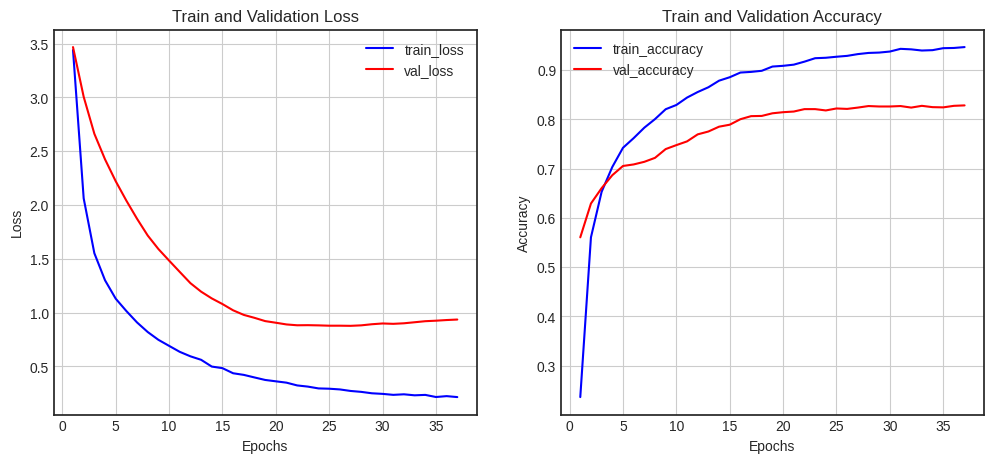

In [13]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-v0_8-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [12]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]
# 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# 평가 결과를 출력합니다.
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


71/71 [==============================] - 0s 5ms/step - loss: 1.0242 - accuracy: 0.8032
Test Loss: 1.0241637229919434
Test Accuracy: 0.8032057285308838
